<a href="https://colab.research.google.com/github/mohamedELBAHA/Model-Validation/blob/main/Earth_Temperature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERSONS INVOLVED IN THE GROUP (5 students):** Nada ABDALLAOUI - Fatima-zahra KERDAD - Imane ZRIAA - Mohamed EL BAHA - Hazim BENSLIMANE

**Before starting:**

You need to install Basemap. You have to do it at each new session.

In [ ]:
%%bash
apt-get install libgeos-3* libgeos-dev
pip install https://github.com/matplotlib/basemap/archive/master.zip

Reading package lists...
Building dependency tree...
Reading state information...
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
  Created wheel for basemap: filename=basemap-1.2.2+dev-cp37-cp37m-linux_x86_64.whl size=121759589 sha256=b9a7699c0c048a2d14619e27b5af02b3fa37d0be32c741c818c7979c02fd013f
  Stored in directory: /tmp/pip-ephem-wheel-cache-61sxy95d/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=f8b31b09bf4d8af5f01855e647060aabed1a91b4e9c740d8489c97db5d3788de
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built basemap pyshp


**Goal of this practice:**

The goal is to use a cloud computing platform (the Google Cloud Platform). We will use big data tools on Colab to process large datasets. These data are real satellite observations of the ocean (5 years).

**Evaluation of this practice:**

I will evaluate 3 main components.

The first is the quality of the code. It must be concise and well written. The goal is to manipulate big data tools provided by the Google Cloud Platform (such as BigQuery).

The second is the quality of the outputs. Never forget that you are dealing with physical variables evolving in space and time. You must use maps and time series. You must also write the units (e.g., °C, m).

The third thing is the discussion about your results. Again, remember that you are dealing with oceanographic data. They have a physical meaning and you should be able to comment the outputs.

**Import libraries:**

- matplotlib (2D plotting)
- pylab (scientific computing)
- basemap (plotting 2D data on maps)
- scikit-learn (machine learning)
- pandas (data structures and data analysis tools)

In [ ]:
%matplotlib inline
%pylab inline
from mpl_toolkits.basemap import Basemap
import sklearn
import pandas as pd
from scipy.stats.mstats import zscore
import warnings
from sklearn.linear_model import LinearRegression
import numpy as np
warnings.filterwarnings("ignore") # disable warnings
pylab.rcParams['figure.figsize']=(20,20) # graph size

Populating the interactive namespace from numpy and matplotlib


**Declare functions:**
- plot_im (plot satellite image with geographic coordinates)
- plot_ts (plot time series)

In [ ]:
# function to plot images  
def plot_im(lon,lat,im,size_points,var_name):
    
    # transform to arrays (just in case)
    lon=array(lon)
    lat=array(lat)
    im=array(im)
    
    if max(lon)-min(lon)<100:
      # Mercator projection (for small zone)
      m=Basemap(projection='merc',llcrnrlat=nanmin(lat),urcrnrlat=nanmax(lat),\
                llcrnrlon=nanmin(lon),urcrnrlon=nanmax(lon),lat_0=(nanmax(lat)+nanmin(lat))*0.5,\
                lon_0=(nanmax(lon)+nanmin(lon))*0.5,resolution='l')
    else:
      # Orthogonal projection (for large zone)
      m=Basemap(projection='ortho',lat_0=0,lon_0=0,resolution='l')
    # you can use other projections (see https://matplotlib.org/basemap/users/mapsetup.html)
    
    # transform (lon,lat) to (x,y)
    x,y=m(lon,lat)

    # plot
    im=ma.masked_where(isnan(im),im)
    res=m.scatter(x,y,size_points,im,'o',alpha=1,cmap='jet',lw=0)
    m.drawcoastlines()
    m.fillcontinents()
    parallels = linspace(nanmin(lat),nanmax(lat),15)
    meridians = linspace(nanmin(lon),nanmax(lon),15)
    #m.drawparallels(parallels,labels=[1,0,0,1],fontsize=10)
    #m.drawmeridians(meridians,labels=[1,0,0,1],fontsize=10)
    cb=m.colorbar(res,location="right")
    cb.set_label(var_name,fontsize=15)
    
# function to plot time series
def plot_ts(time,SST,line_type,var_name):

    # plot
    plot_date(time,SST,line_type)
    xlabel('Time',fontsize=15)
    ylabel(var_name,fontsize=15)

**The satellite database:**

In this practice, we use 5 years (2011-2015) of satellite observations of the global ocean. We use daily data with 25km spatial resolution. We study the Sea Surface Temperature (SST, in degrees) and the Sea Surface Height (SSH, in meters). SST and SSH are indexed in space (lon, lat) and time. The full database is stored in csv files and is quite large (~50Go).

**Part 1) Manipulation of a small dataset using pandas:**

We start to work on a small database (only the 10 first days in 2015, ~250Mo) and we will perform some basic statistics. The idea is to show that even if you use a small sample, basic data manipulation without big data tools is difficult, time and resource consuming.

After copying the dataset "data_sst_ssh_2015_small.csv" on your Colab environment, we read it using pandas (easy-to-use data structures and data analysis tools). We use the *groupby* and *mean* pandas functions to: map the global SST and SSH (using *plot_im*), plot the mean SST and SSH time series (using *plot_ts*).

In [ ]:
# read dataframe
data = pd.read_csv('data_sst_ssh_2015_small.csv', header=None, names=['lat', 'lon', 'sst', 'time', 'ssh'])

In [ ]:
# sample of the dataset
data.head()

lat      lon  sst      time     ssh
0 -77.625  322.625 -1.8  735600.0 -1.2535
1 -77.375  319.625 -1.8  735600.0 -1.2179
2 -77.375  319.875 -1.8  735600.0 -1.2214
3 -77.375  320.125 -1.8  735600.0 -1.2247
4 -77.375  320.375 -1.8  735600.0 -1.2285

In [ ]:
# statistics of the dataset
data.describe()

lat            lon  ...           time            ssh
count  857351.000000  857351.000000  ...  857350.000000  857350.000000
mean      -21.299564     188.956773  ...  735600.378499       0.293284
std        34.888551     101.422104  ...       0.485013       0.761126
min       -77.625000       0.125000  ...  735600.000000      -1.510800
25%       -49.375000     101.625000  ...  735600.000000      -0.181900
50%       -28.375000     193.875000  ...  735600.000000       0.555300
75%        -2.125000     268.625000  ...  735601.000000       0.838300
max        83.375000     359.875000  ...  735601.000000       1.898000

[8 rows x 5 columns]

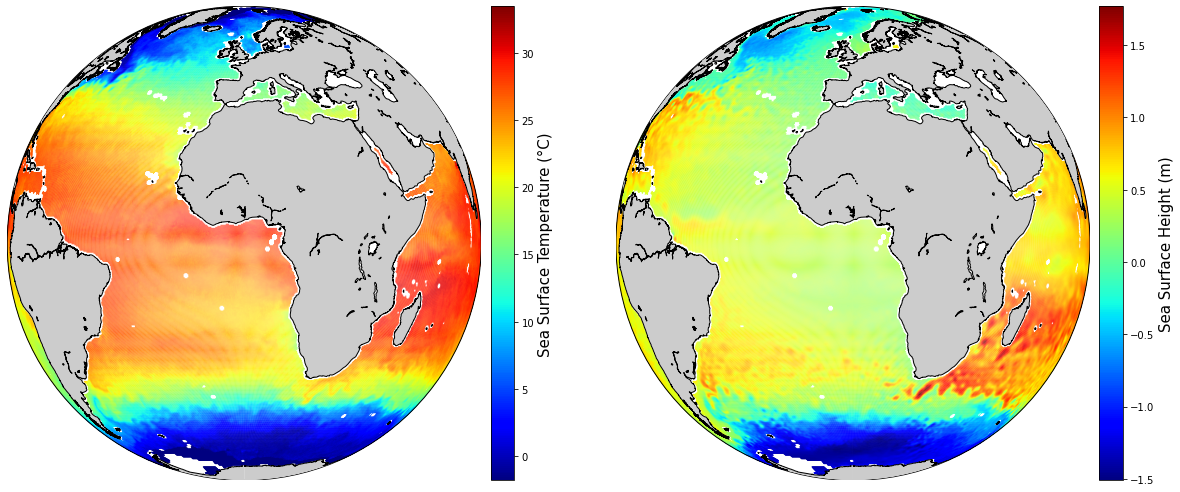

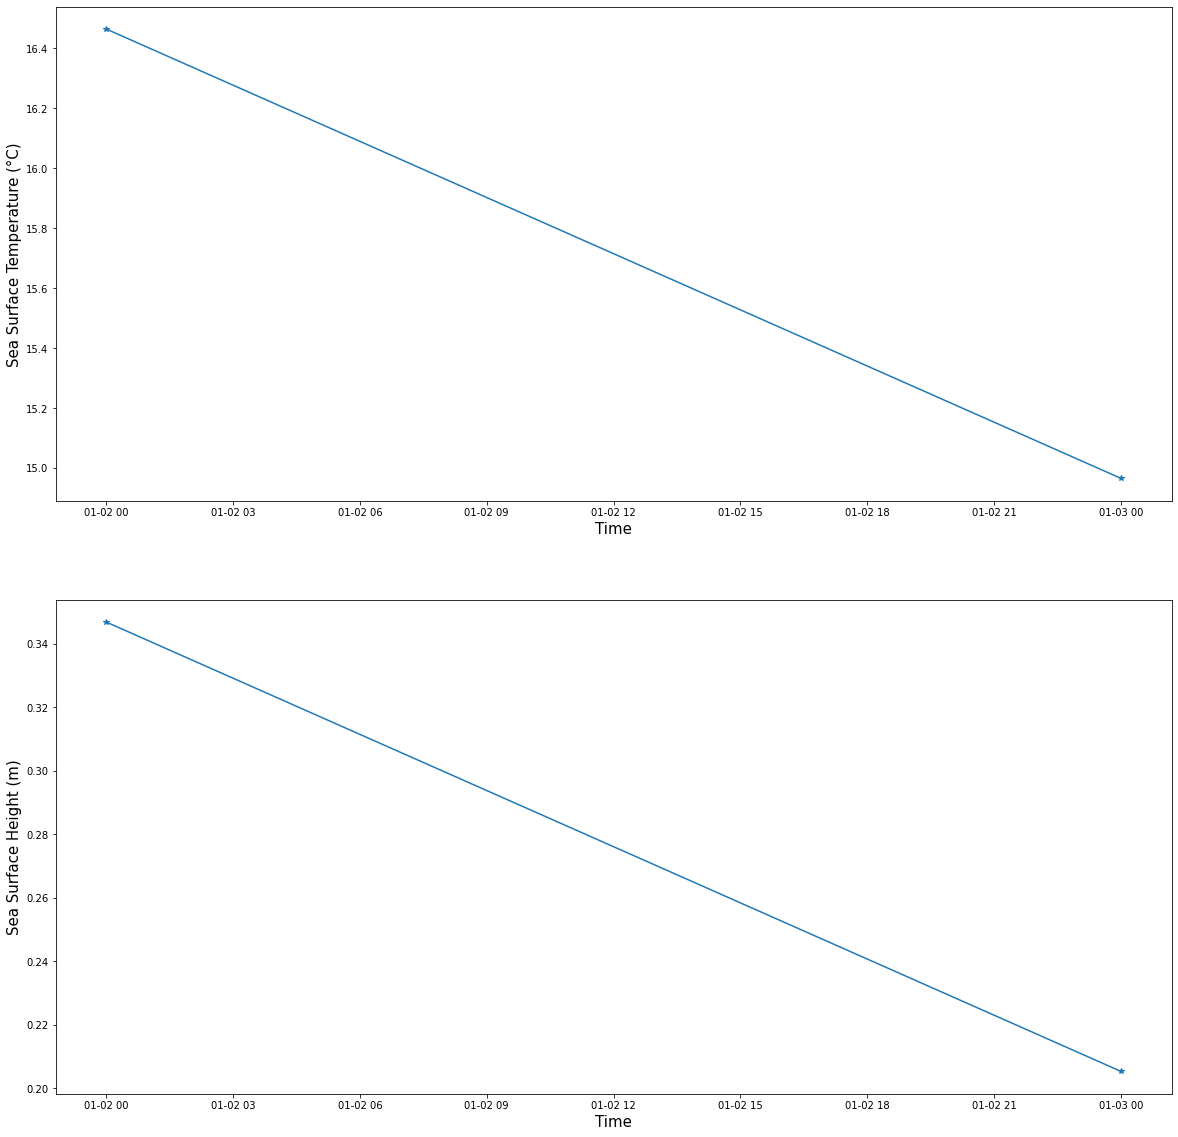

In [ ]:
# plot global SST and SSH maps
sst_im=data.groupby(['lon','lat'])['sst'].mean()
ssh_im=data.groupby(['lon','lat'])['ssh'].mean()
lon_im=data.groupby(['lon','lat'])['lon'].mean()
lat_im=data.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_im,lat_im,sst_im,1,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_im,lat_im,ssh_im,1,'Sea Surface Height (m)')

# plot global SST and SSH time series
sst_ts=data.groupby(['time'])['sst'].mean()
ssh_ts=data.groupby(['time'])['ssh'].mean()
time_ts=data.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_ts,sst_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_ts,ssh_ts,'-*','Sea Surface Height (m)')

Now, we consider only a small region of the Globe: the Mediterranean Sea. As previously, we plot the mean time series and maps of SST and SSH. We also plot the SSH as a function of SST and the 2 distributions using histograms.

Text(0, 0.5, 'Sea Surface Height (m)')

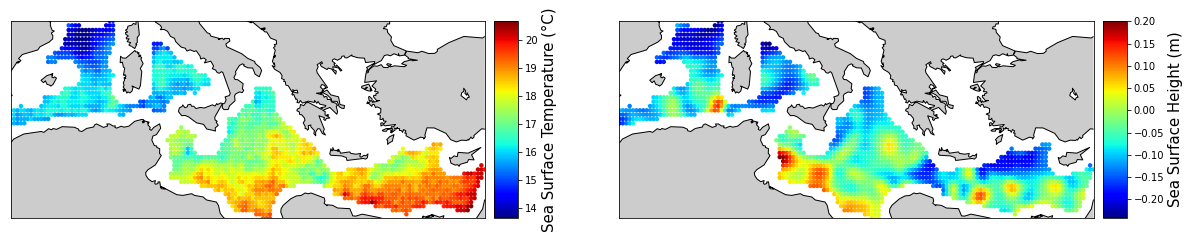

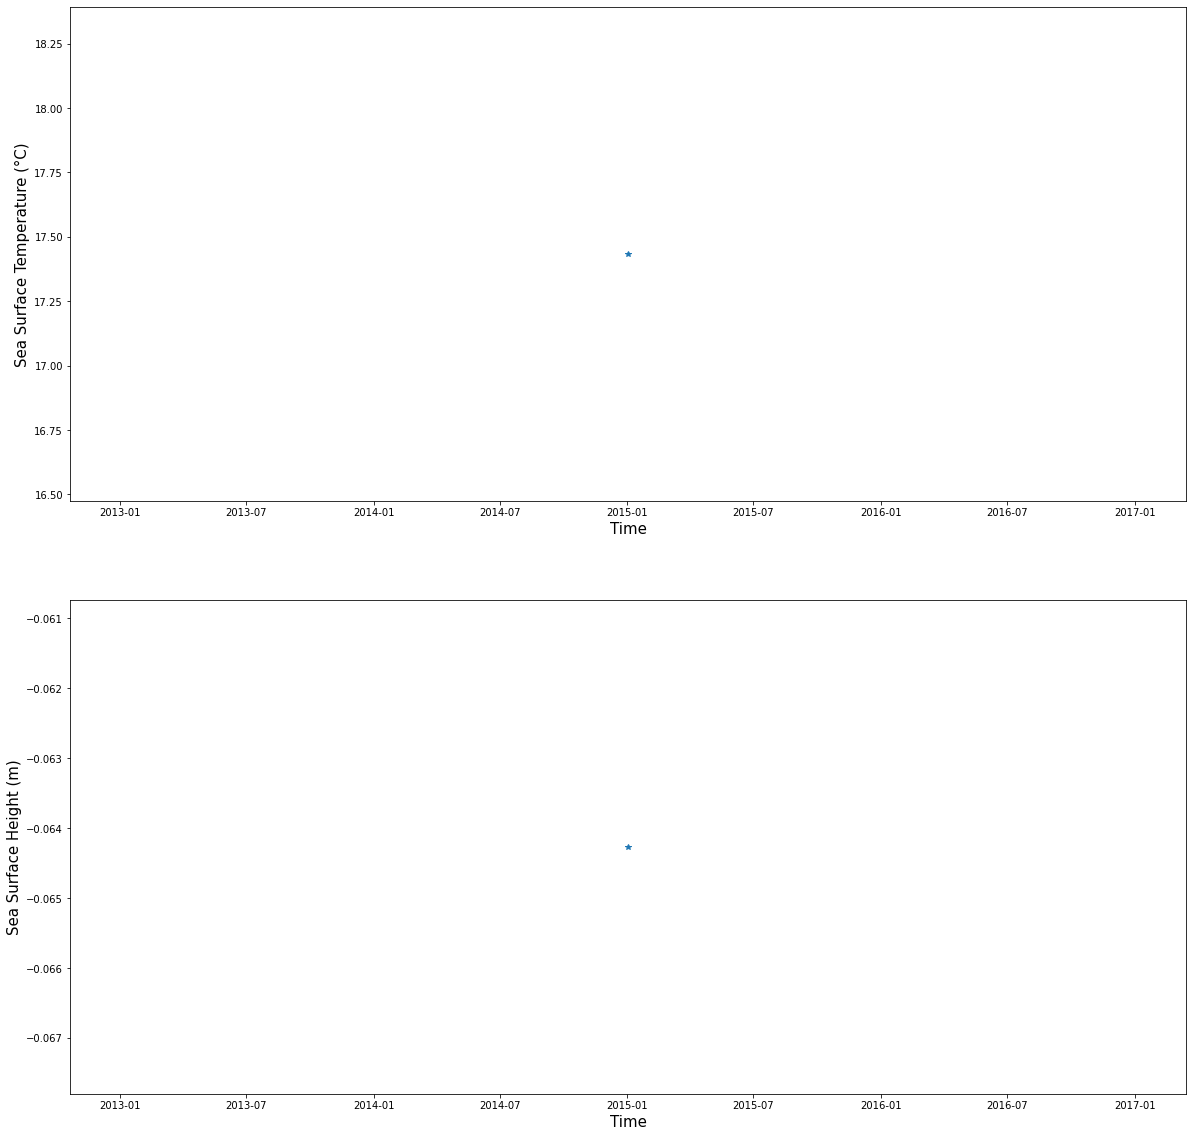

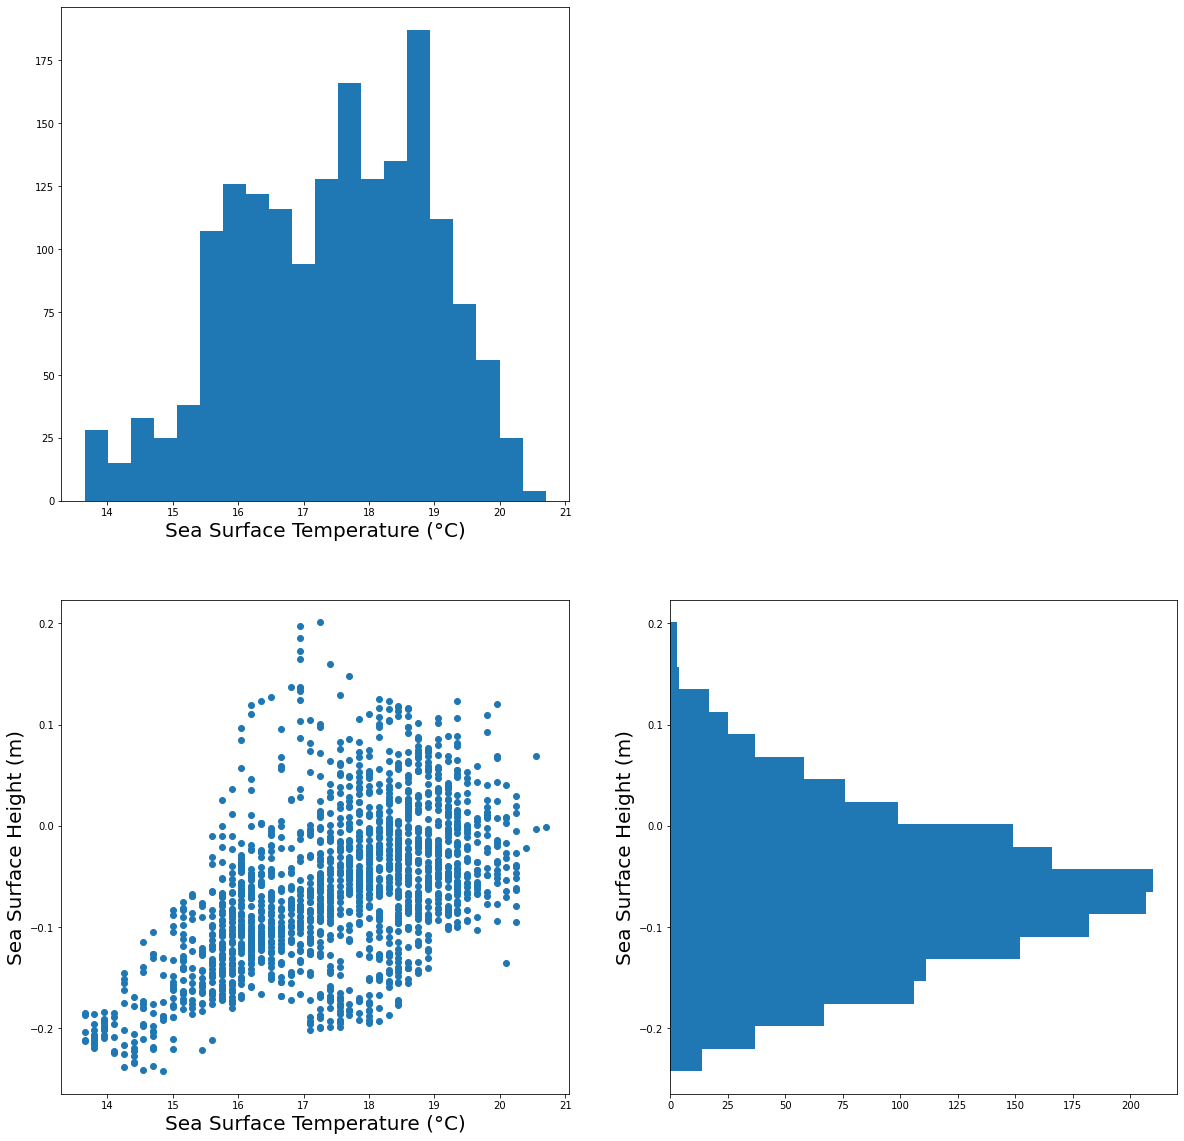

In [ ]:
# data selection
data_med=data[(data.lon>0) & (data.lon<35) & (data.lat>30) & (data.lat<45)]

# plot SST and SSH maps
sst_med_im=data_med.groupby(['lon','lat'])['sst'].mean()
ssh_med_im=data_med.groupby(['lon','lat'])['ssh'].mean()
lon_med_im=data_med.groupby(['lon','lat'])['lon'].mean()
lat_med_im=data_med.groupby(['lon','lat'])['lat'].mean()
figure()
subplot(1,2,1)
plot_im(lon_med_im,lat_med_im,sst_med_im,20,'Sea Surface Temperature (°C)')
subplot(1,2,2)
plot_im(lon_med_im,lat_med_im,ssh_med_im,20,'Sea Surface Height (m)')

# plot SST and SSH time series
sst_med_ts=data_med.groupby(['time'])['sst'].mean()
ssh_med_ts=data_med.groupby(['time'])['ssh'].mean()
time_med_ts=data_med.groupby(['time'])['time'].mean()
figure()
subplot(2,1,1)
plot_ts(time_med_ts,sst_med_ts,'-*','Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(time_med_ts,ssh_med_ts,'-*','Sea Surface Height (m)')

# plot hist(SST), hist(SSH), SSH~SST
figure()
subplot(2,2,1)
hist(data_med.sst, 20)
xlabel('Sea Surface Temperature (°C)', size=20)
subplot(2,2,4)
hist(data_med.ssh, 20, orientation=u'horizontal')
ylabel('Sea Surface Height (m)', size=20)
subplot(2,2,3)
scatter(data_med.sst, data_med.ssh)
xlabel('Sea Surface Temperature (°C)', size=20)
ylabel('Sea Surface Height (m)', size=20)

**Remark:**

The dataset used above is small (250Mo) and corresponds only to 10 days. Now, we want to manipulate the full database of 5 years (50Go) using big data tools. This database is stored in the Google Cloud Platform.

**Part 2) Manipulation of the full database using BigQuery**

First, we have to connect to the Google Cloud Platform using the following command. You will have to enter the login "bigdataocean2020@gmail.com". Send me an email to get the password (pierre.tandeo@imt-atlantique.fr). Then, copy/paste the authentification code in the following cell.

In [ ]:
from google.colab import auth
auth.authenticate_user()

The Google Cloud Platform has set up a tool to handle large databases. This is called "BigQuery" and it is based on the NoSQL ("Not only SQL") language. The syntax in BigQuery is very similar to the pandas example given in Part 1). For instance, in the example below, we plot the mean SST map in the Mediterranean Sea over the period 2011-2015. The full 5-years dataset is stored in the BigQuery table *bdo2020.bdo2020.2011_2015*. The project is called *alert-ground-261008* (strange but you have to provide it). The result of the BigQuery request is stored in the *output* dataframe. 

In [ ]:
%%bigquery --project alert-ground-261008 output
SELECT lon, lat, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45
GROUP BY lon, lat

In [ ]:
# sample of the dataframe
output

lon     lat   mean_sst
0     29.125  31.625  22.716292
1     29.625  32.375  22.375137
2     33.625  32.375  23.340197
3     16.125  32.625  22.576150
4     24.875  32.875  22.058954
...      ...     ...        ...
1718  16.375  33.125  22.241320
1719  17.875  33.375  21.916922
1720  25.875  33.875  21.811774
1721  32.125  33.875  22.795975
1722  17.875  34.125  21.705394

[1723 rows x 3 columns]

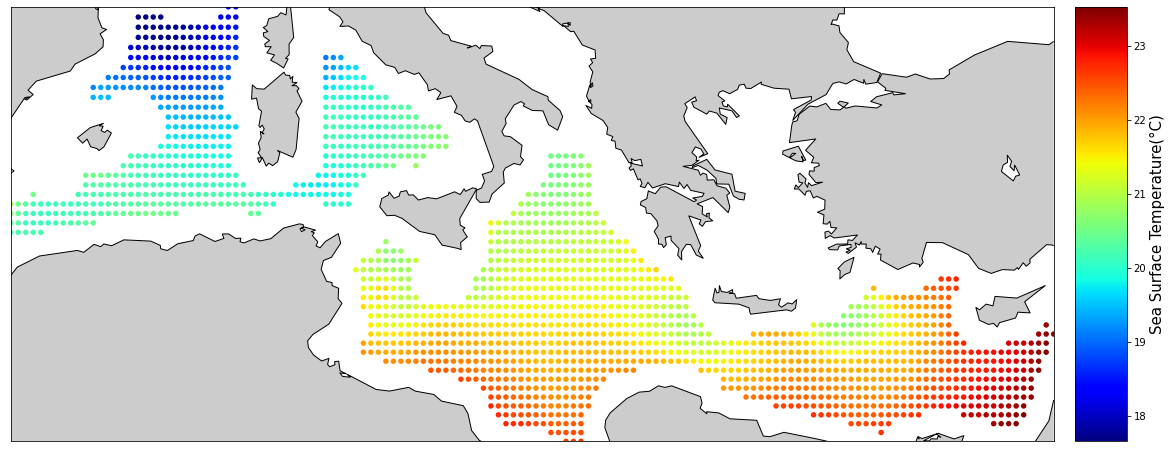

In [ ]:
plot_im(output.lon,output.lat,output.mean_sst,30,'Sea Surface Temperature(°C)')

SQL language is suitable to manipulate and compute basic statistics such as the mean, standard deviation, minimum, maximum, correlation, etc... Here you will find the list of basic functions: https://cloud.google.com/bigquery/docs/reference/legacy-sql?hl=fr.

It is also possible to use Machine Learning algorithms inside BigQuery. Here you will find a complete description of the possibilities: https://cloud.google.com/bigquery-ml/docs/bigqueryml-intro?hl=fr. Another solution (easiest way of doing) is to extract a small amount of data in BigQuery and then use scikit-learn: https://scikit-learn.org/stable/.

**Important note:** the tables stored in the Google Cloud Platform are not chronologically ordered. When dealing with time series, you will thus have to use *ORDER BY time* in your BigQuery requests.

**QUESTION 1**: Compute and plot the correlation map over the period 2011-2015 between SST and SSH in the Agulhas current, between longitudes (+15,+70) and latitudes (-50,-30).

In [ ]:
%%bigquery --project alert-ground-261008 output1
SELECT lon, lat, CORR(sst, ssh) AS corr_sst_ssh 
FROM bdo2020.bdo2020.2011_2015
WHERE lon>15 AND lon<70 AND lat>-50 AND lat<-30
GROUP BY lon, lat

In [ ]:
output1.head()

lon     lat  corr_sst_ssh
0  20.625 -49.875     -0.042647
1  25.375 -49.875      0.484100
2  30.375 -49.875      0.808005
3  34.375 -49.875      0.315479
4  38.625 -49.875      0.340738

In [ ]:
f"Max correlation SST & SSH: {output1['corr_sst_ssh'].max()}" , f"Min correlation SST & SSH: {output1['corr_sst_ssh'].min()}"

('Max correlation SST & SSH: 0.892846101985295',
 'Min correlation SST & SSH: -0.3202960769729913')

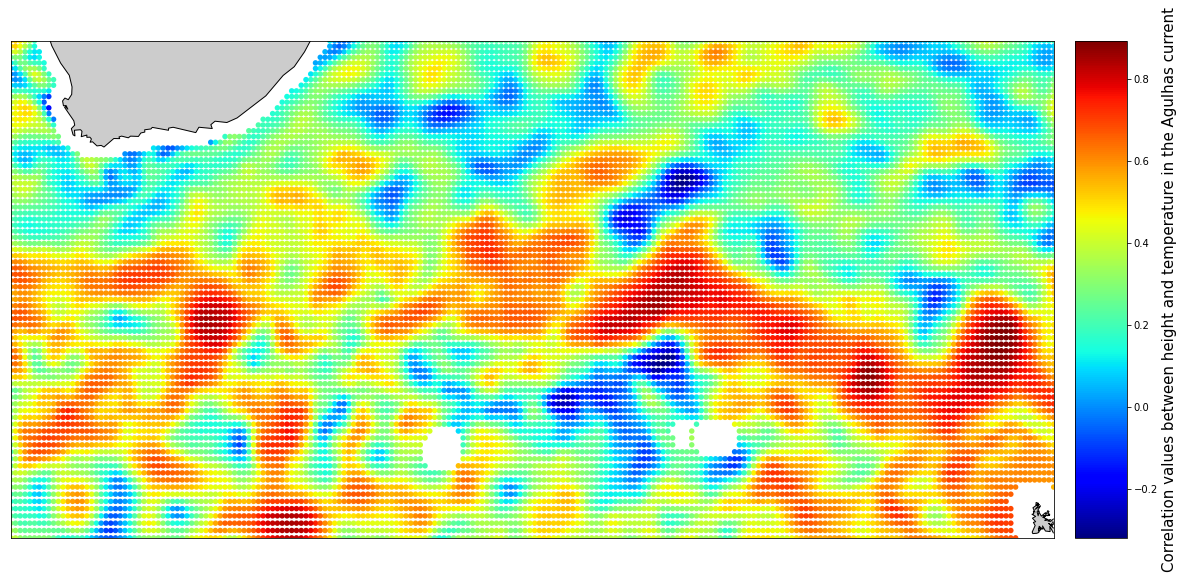

In [ ]:
plot_im(output1.lon,output1.lat,output1.corr_sst_ssh,30,'Correlation values between height and temperature in the Agulhas current')

**QUESTION 2**: Plot the dealy mean and standard deviation time series of SST for the period 2011-2015 in the Equatorial Pacific, between longitudes (+180,+300) and latitudes (-20,+20). The mean SST time series is called the ENSO index and is used to identify El Nino and La Nina events.

In [ ]:
%%bigquery --project alert-ground-261008 output2
SELECT time, AVG(SST) AS dealy_mean_SST, STDDEV(SST) AS standard_deviation
FROM bdo2020.bdo2020.2011_2015
WHERE lon>180 AND lon<300 AND lat>-20 AND lat<20
GROUP BY time
ORDER BY time ASC

In [ ]:
output2.head()

time  dealy_mean_SST  standard_deviation
0  734138.0       25.122176            2.009131
1  734139.0       25.159626            1.976392
2  734140.0       25.178380            1.958183
3  734141.0       25.180295            1.936266
4  734142.0       25.184382            1.925013

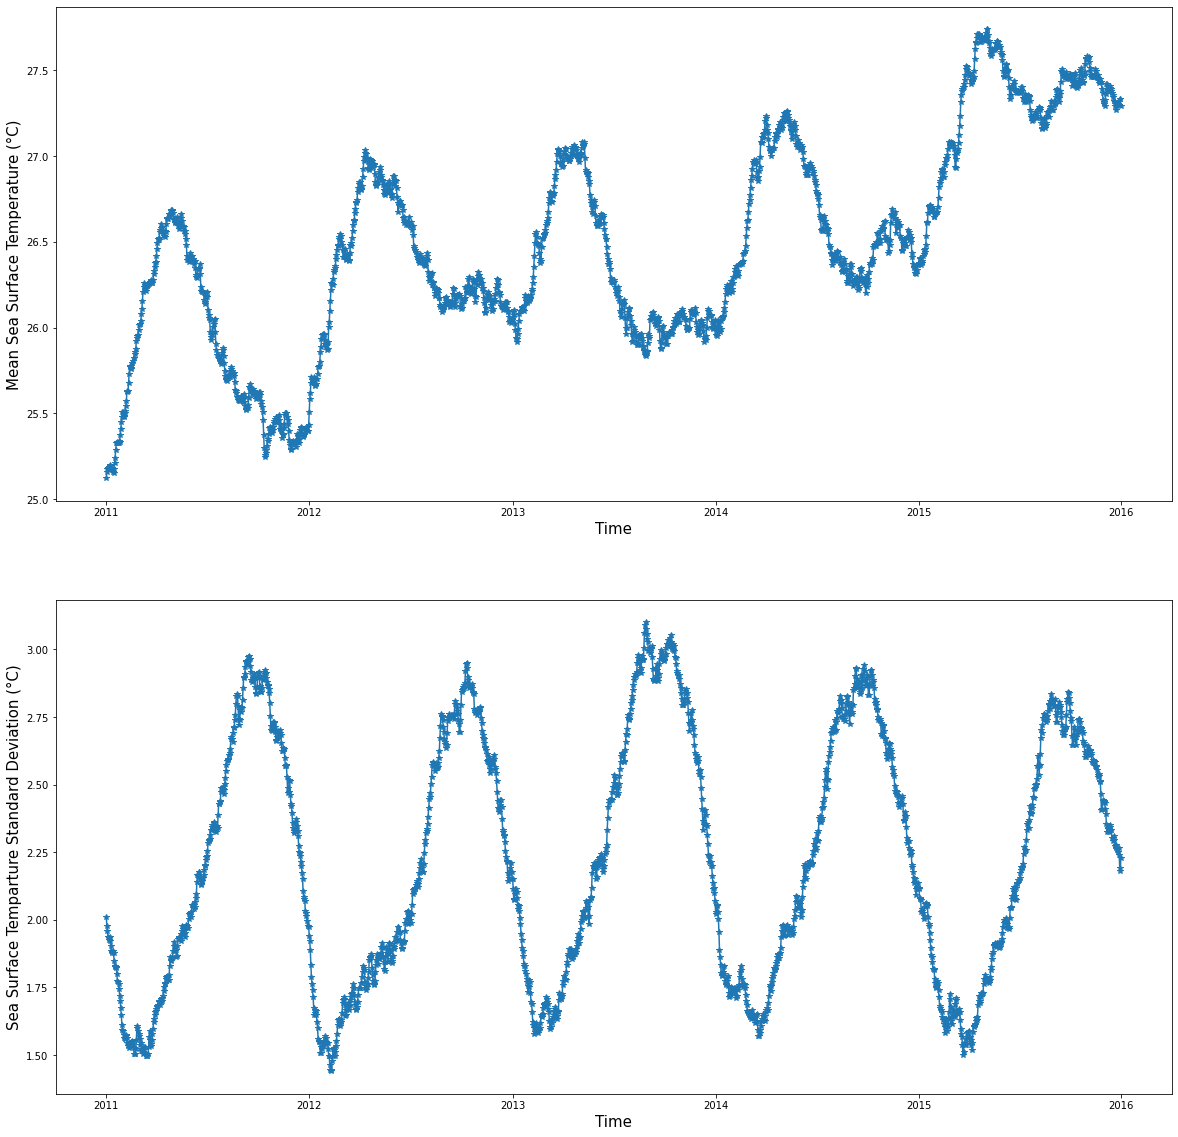

In [ ]:
figure()
subplot(2,1,1)
plot_ts(output2.time,output2.dealy_mean_SST,'-*','Mean Sea Surface Temperature (°C)')
subplot(2,1,2)
plot_ts(output2.time,output2.standard_deviation,'-*','Sea Surface Temparture Standard Deviation (°C)')

1. **El Niño (a warm event) occurs in the years 2015-2016, the sea surface temperature increases throughout the years before reaching a peak between mid-2015 and early 2016.** 
2. **El Niña (a warm event) occurs in early 2011, the sea surface temperature is lower than normal.** 

**QUESTION 3**: Compute the dealy time series of SST over the period 2011-2015 in the Pacific Ocean, south of Japan, between longitudes (+120,+145) and latitudes (+20,+40). In this region, there are a lot of typhoons and they use the energy of the sea (hot waters) to get stronger. Thus, after a typhoon, we see a rapid decrease of the SST. Plot the time series of the difference of SST between 2 consecutive days and check that the negative peaks (e.g., below -0.4°C) correspond to well known typhoons.

In [ ]:
%%bigquery --project alert-ground-261008 output3
SELECT time, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>120 AND lon<145 AND lat>+20 AND lat<40
GROUP BY time
ORDER BY time ASC

In [ ]:
output3.head()

time   mean_sst
0  734138.0  20.681954
1  734139.0  20.496030
2  734140.0  20.455747
3  734141.0  20.402332
4  734142.0  20.315408

In [ ]:
output3['diff_sst'] = output3['mean_sst'].diff() #To compute the difference of SST between 2 consecutive days  

In [ ]:
output3.head()

time   mean_sst  diff_sst
0  734138.0  20.681954       NaN
1  734139.0  20.496030 -0.185924
2  734140.0  20.455747 -0.040283
3  734141.0  20.402332 -0.053415
4  734142.0  20.315408 -0.086924

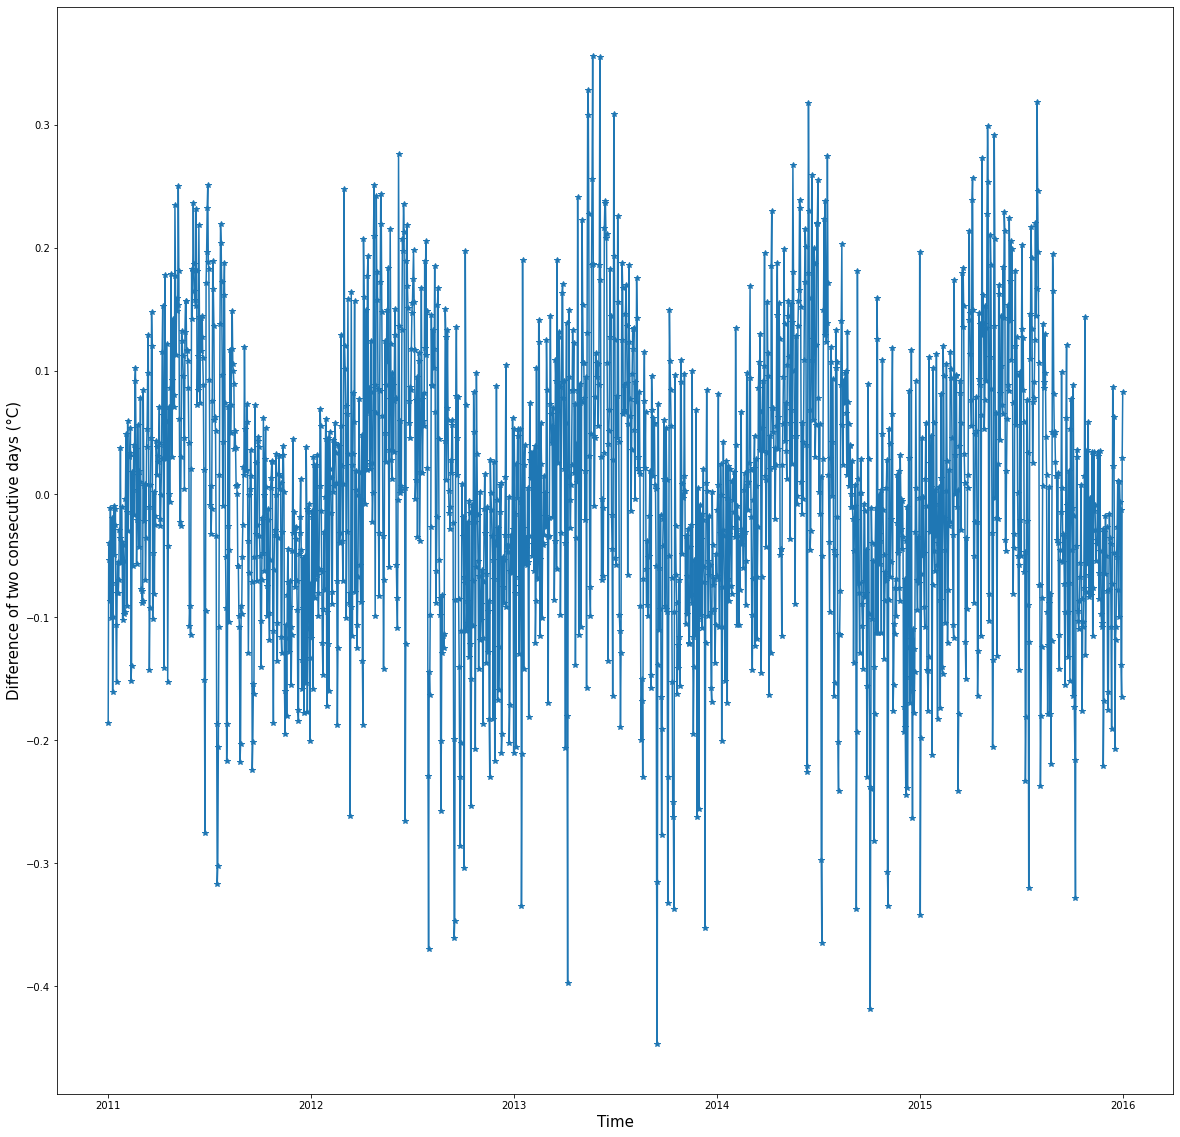

In [ ]:
figure()
plot_ts(output3.time,output3.diff_sst,'-*','Difference of two consecutive days (°C)')

In [ ]:
output3[output3['diff_sst']<-0.4]

time   mean_sst  diff_sst
988   735126.0  27.711799 -0.447307
1371  735509.0  26.199028 -0.418684

**As shown in the graph above, we have two negatives peaks (below -0.4) correponding to well known Typhoons. The first one happened in early 2013 (22 Octobre 2013) named Typhoon Wipha, and the second one is The 2014 (October 2014) named Typhoon Phanfone.**

**Part 3) Combination of BigQuery and scikit-learn**

Now, we will extract data using BigQuery and apply regressions (using scikit-learn) on these extracted data. 

Note that there is another way to use machine learning algorithms (like the linear regression) in BigQuery, but this solution is difficult to implement: I suggest to use the classic one (i.e., using scikit-learn).

**QUESTION 4**: Model the daily mean SST in the Mediterranean Sea using a linear tendancy and a one-year seasonal cycle such that: $SST(t)=\alpha_0 + \alpha_1 t + \alpha_2 sin(2\pi\omega t) + \alpha_3 cos(2\pi\omega t)$, with $\omega=\frac{1}{365}$. Then, plot the raw time series and the one produced by the model. Finally, plot the autocorrelation function of the residuals (difference between the raw time series and the estimation made by the model).

In [ ]:
%%bigquery --project alert-ground-261008 output4
SELECT time, AVG(sst) AS mean_sst
FROM bdo2020.bdo2020.2011_2015
WHERE lon>0 AND lon<35 AND lat>30 AND lat<45
GROUP BY time
ORDER BY time ASC

In [ ]:
output4.tail()

time   mean_sst
1821  735959.0  18.417702
1822  735960.0  18.358416
1823  735961.0  18.348665
1824  735962.0  18.194399
1825  735963.0  18.055543

In [ ]:
t = output4['time'] #Time
w=1/365
pi = np.pi 
sin_t = np.sin(2*pi*w*t) 
cos_t = np.cos(2*pi*w*t)

In [ ]:
X = pd.concat([t, sin_t, cos_t], axis=1)
X.columns = ['Time', 'sin_time', 'cos_time']
y_true = output4['mean_sst'] #The true mean

In [ ]:
model = LinearRegression() #ML model used for prediction
model.fit(X, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'Estimated coefficients for the linear regression problem : {model.coef_}')
print(f'Estimated intercept : {model.intercept_}')
print(f'Score of my model : {model.score(X,y_true)}')

Estimated coefficients for the linear regression problem : [ 1.09652910e-05 -5.82212952e-01  5.81584047e+00]
Estimated intercept : 13.085404097914337
Score of my model : 0.9789183076283473


In [ ]:
y_pred = model.predict(X) # Daily mean SST predicted by our model

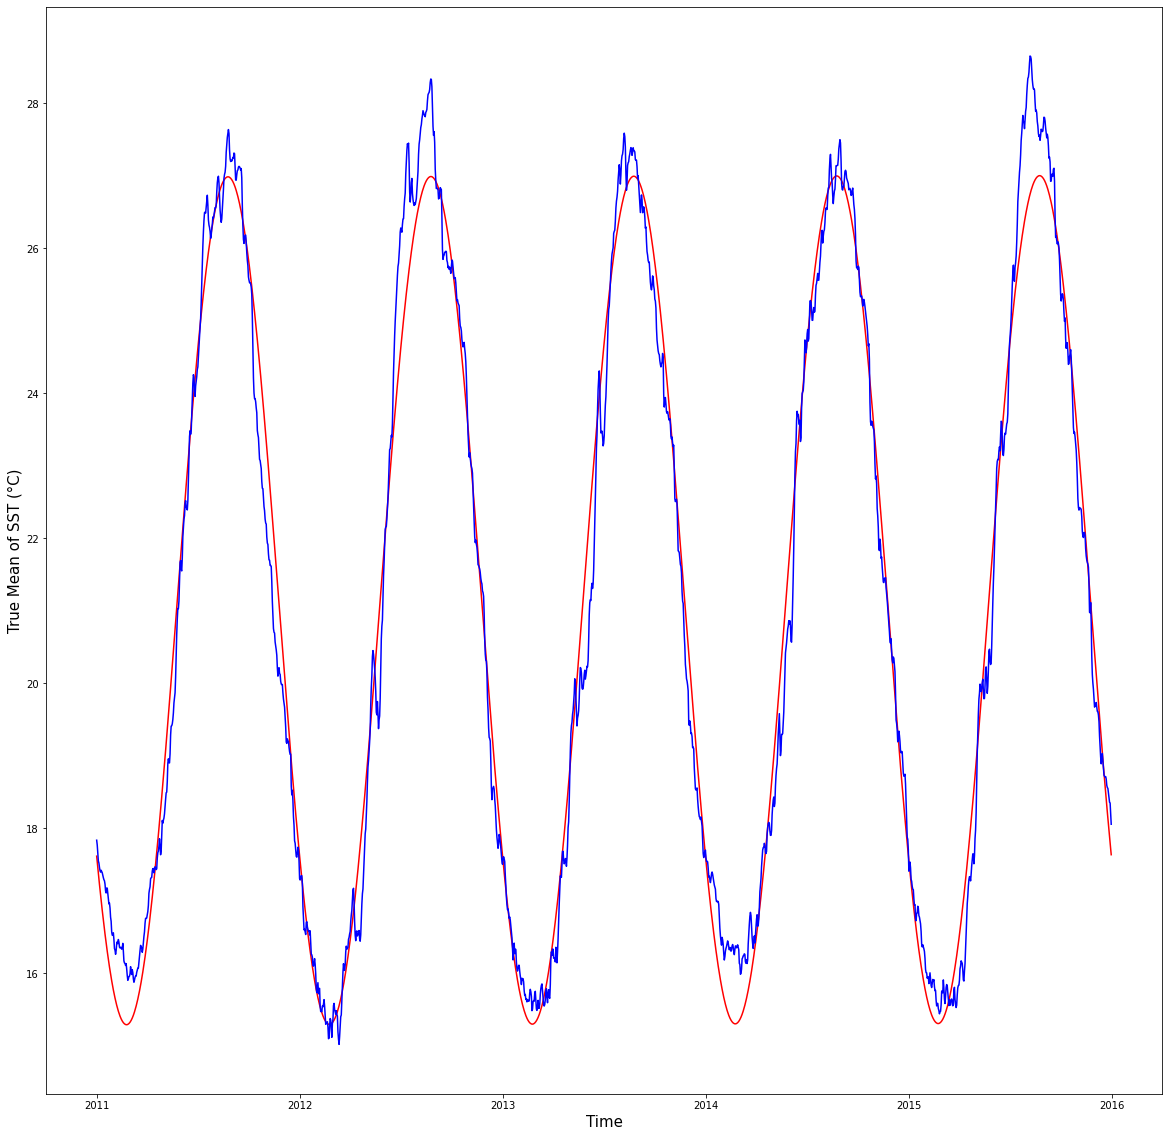

In [ ]:
plot_ts(t,y_pred,'r-','Regression Model of the mean of SST between 2011 and 2015 in the mediterranean Sea') # Predicted Daily SST 
plot_ts(t,y_true,'b-','True Mean of SST (°C)') # True values of Daily SST

In [ ]:
f"Predicted Maximun of SST: {y_pred.max()} (°C)",f" True Maximum of SST:  {y_true.max() }(°C) "

('Predicted Maximun of SST: 26.9989119920675 (°C)',
 ' True Maximum of SST:  28.648694138131166(°C) ')

**We got a good prediction using a linear regression model, nevertheless the maximum predicted daily mean value didn't pass 27°C comparing to the ground-truth values in which the maximum value reach 29°C, in the other hand the model gives a good prediction on below zero temperatures.**

In [ ]:
residuals = y_true - y_pred

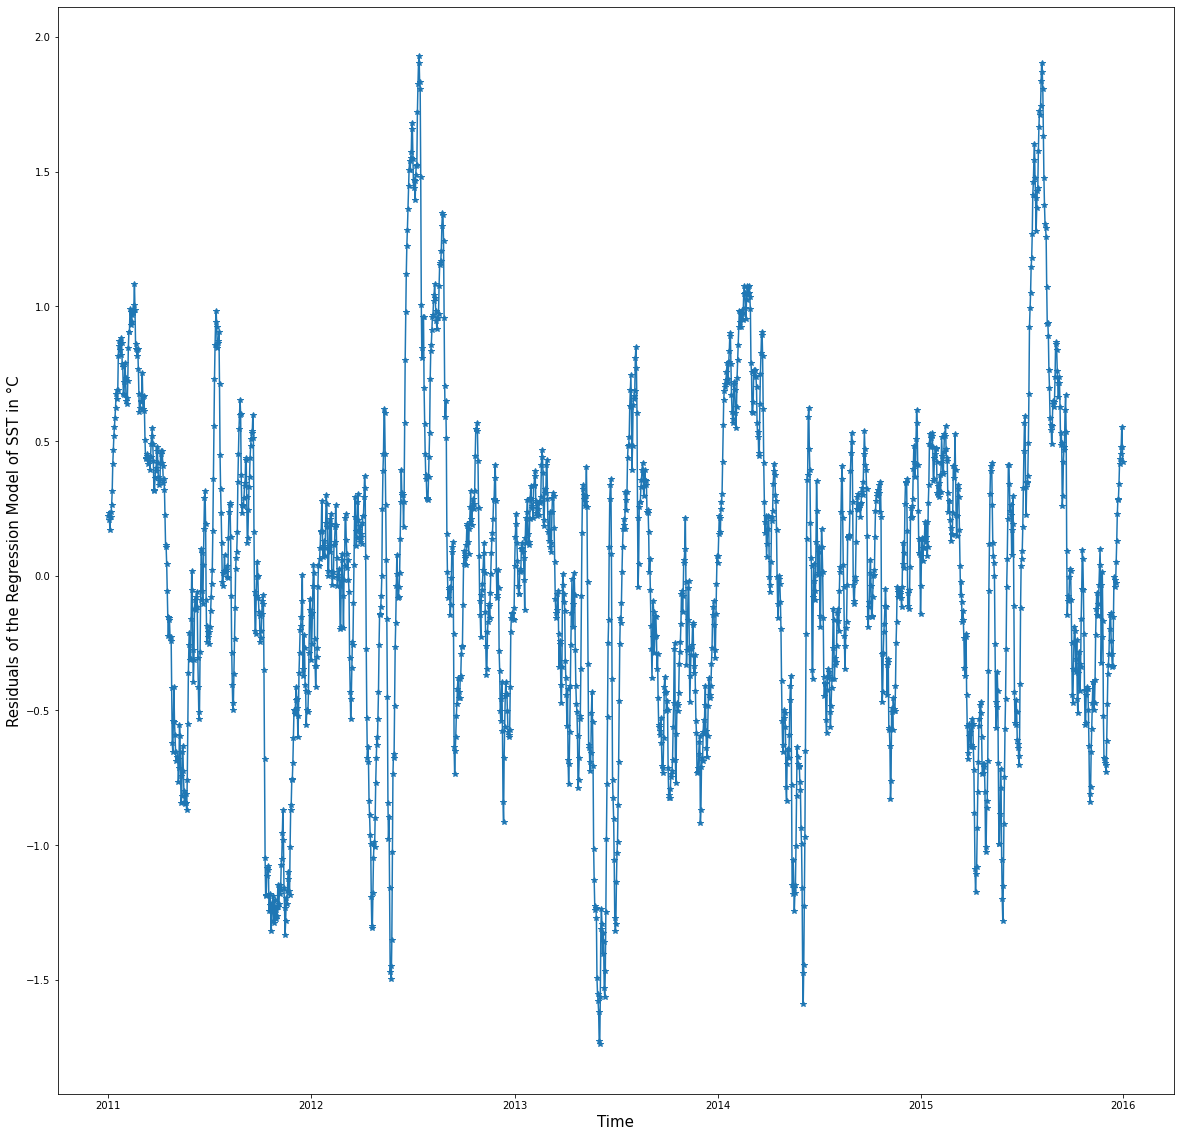

In [ ]:
plot_ts(t,residuals,'-*','Residuals of the Regression Model of SST in °C') # True values of Daily SST

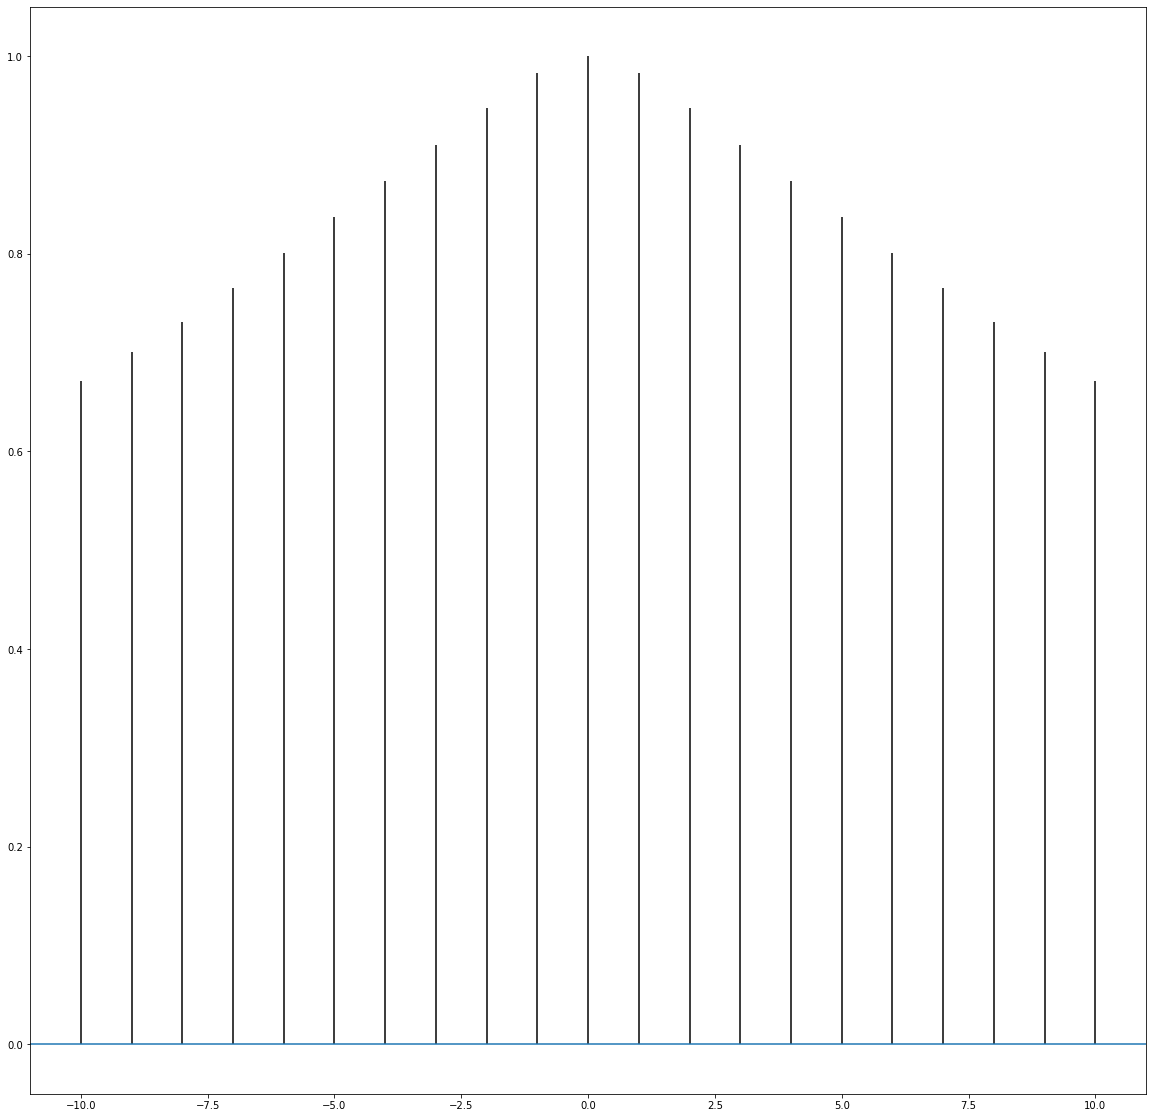

In [ ]:
acorr(residuals.values); # Display autocorrelation function of the residuals

**This symmetrical correlogram shows the autocorrelation of the residuals. They go from 0.65 to 1 at lags of -10 to 0 and from 1 to 0.65 at lags 0 to +10 showing the peak is reached at the origin.**

**QUESTION 5**: Compute the SSH difference between the first day in 2011 and the last day in 2015 for each location in the globe. Then, plot the map of this SSH difference: it shows the sea level rise. Finally, adjust a regression to model the tendancy of the global mean sea level rise (averaged over all the location) and plot the prediction for the horizon 2100.

In [ ]:
%%bigquery --project alert-ground-261008 output5a
SELECT lon, lat, ssh
FROM bdo2020.bdo2020.2011_2015
WHERE time = 734138.0 #First day in 2011

In [ ]:
%%bigquery --project alert-ground-261008 output5b
SELECT lon, lat, ssh
FROM bdo2020.bdo2020.2011_2015
WHERE time = 735963.0 #Last day in 2015

In [ ]:
output5a.head()

lon_1   lat_1   ssh_1
0  187.125 -78.375 -1.1581
1  187.375 -78.375 -1.1560
2  187.625 -78.375 -1.1544
3  187.875 -78.375 -1.1522
4  183.625 -78.125 -1.1863

In [ ]:
output5a.shape
output5a.columns=['lon_1','lat_1','ssh_1']

In [ ]:
output5b.head()

lon_2   lat_2   ssh_2
0  173.375 -74.375 -1.2616
1  178.375 -74.375 -1.2014
2  178.625 -74.375 -1.2029
3  178.875 -74.375 -1.2045
4  179.125 -74.375 -1.2053

In [ ]:
output5b.shape
output5b.columns=['lon_2','lat_2','ssh_2']

**We notice that the number of measures in the first day in 2011, differs from the number of measures done in the last day in 2015 (536558 in 2011 vs 542829 in 2015), thus we opted for a join operation, to keep just the locations that were measured in both days.**

### Fisrt Approach: Joining with Pandas

In [ ]:
output5_pd=pd.merge(output5a, output5b, how='inner',left_on=['lon_1','lat_1'], right_on = ['lon_2','lat_2'])


In [ ]:
output5_pd['sea level rise']=output5_pd['ssh_2']-output5_pd['ssh_1']

In [ ]:
output5_pd

lon_1   lat_1   ssh_1    lon_2   lat_2   ssh_2  sea level rise
0       328.625 -76.125 -1.4405  328.625 -76.125 -1.3730          0.0675
1       328.375 -75.875 -1.4355  328.375 -75.875 -1.3710          0.0645
2       329.125 -75.875 -1.4074  329.125 -75.875 -1.3429          0.0645
3       331.625 -75.625 -1.3471  331.625 -75.625 -1.3652         -0.0181
4       328.125 -75.125 -1.3819  328.125 -75.125 -1.3085          0.0734
...         ...     ...     ...      ...     ...     ...             ...
531799  357.625  79.625 -0.2558  357.625  79.625 -0.1681          0.0877
531800  358.125  79.625 -0.2620  358.125  79.625 -0.1770          0.0850
531801  357.875  79.875 -0.2529  357.875  79.875 -0.1543          0.0986
531802  358.875  79.875 -0.2631  358.875  79.875 -0.1554          0.1077
531803  355.625  80.375 -0.2670  355.625  80.375 -0.1983          0.0687

[531804 rows x 7 columns]

### Second Approach Joining with Bigquery

In [ ]:
%%bigquery --project alert-ground-261008 output5
SELECT lon1, lat1, ssh1, ssh2, ssh2 - ssh1 as sea_lvlrise
FROM 
(SELECT lon as lon1, lat as lat1, ssh as ssh1
FROM bdo2020.bdo2020.2011_2015
WHERE time = 734138.0) JOIN 
(SELECT lon as lon2, lat as lat2, ssh as ssh2
FROM bdo2020.bdo2020.2011_2015
WHERE time = 735963.0) ON (lon1 = lon2 AND lat1 = lat2)

In [ ]:
output5

lon1    lat1    ssh1    ssh2  sea_lvlrise
0       328.625 -76.125 -1.4405 -1.3730       0.0675
1       328.375 -75.875 -1.4355 -1.3710       0.0645
2       329.125 -75.875 -1.4074 -1.3429       0.0645
3       331.625 -75.625 -1.3471 -1.3652      -0.0181
4       328.125 -75.125 -1.3819 -1.3085       0.0734
...         ...     ...     ...     ...          ...
531799  357.625  79.625 -0.2558 -0.1681       0.0877
531800  358.125  79.625 -0.2620 -0.1770       0.0850
531801  357.875  79.875 -0.2529 -0.1543       0.0986
531802  358.875  79.875 -0.2631 -0.1554       0.1077
531803  355.625  80.375 -0.2670 -0.1983       0.0687

[531804 rows x 5 columns]

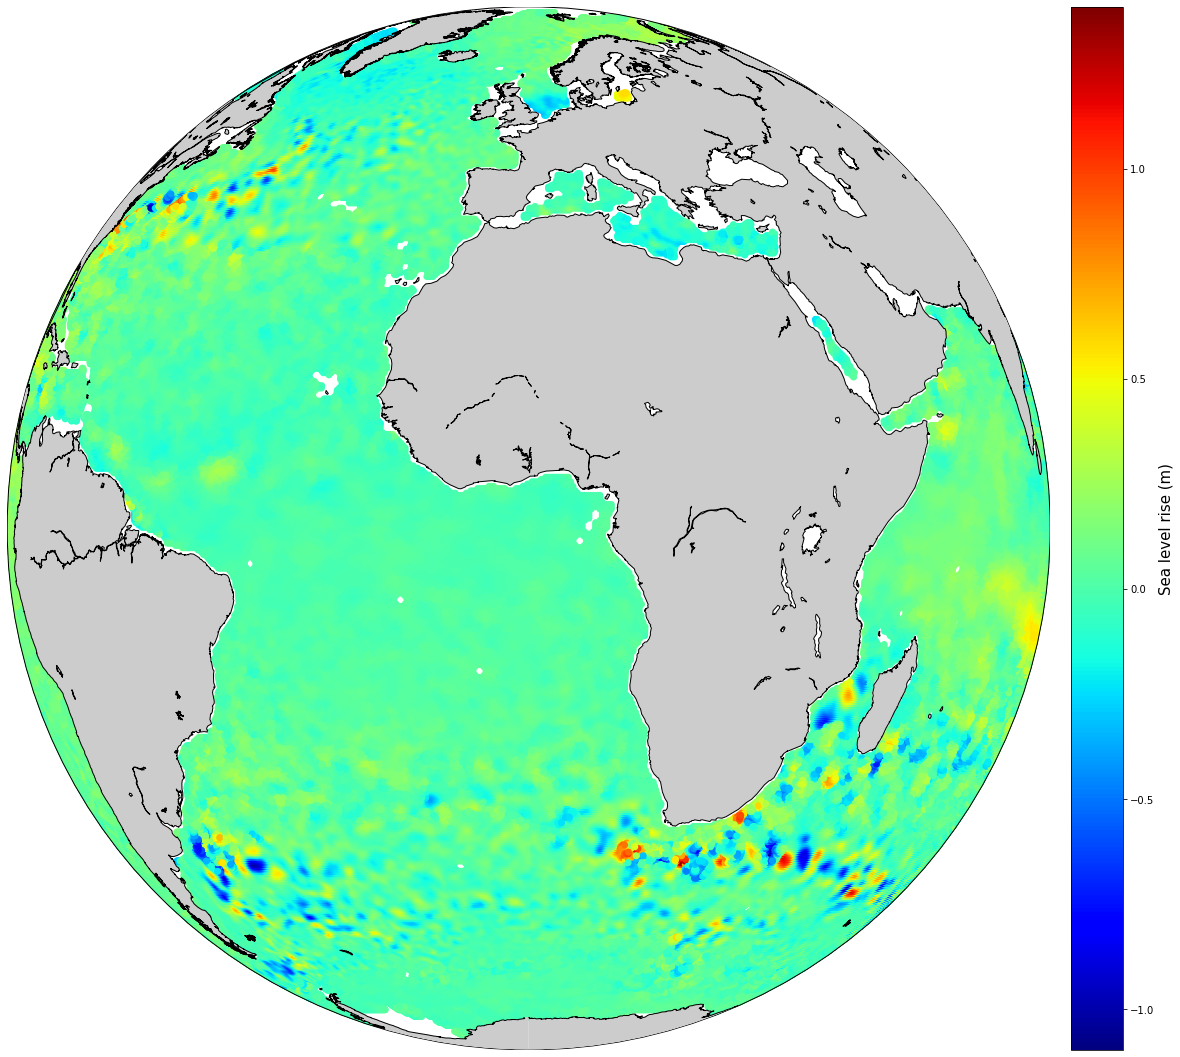

In [ ]:
plot_im(output5.lon1,output5.lat1,output5.sea_lvlrise,50,'Sea level rise (m)')

**Some zones (the red ones) in the atlantic sea, and the indian ocean get a higher sea level rise which means that there exist a danger for these regions in the future. For the most regions of the globe, the sea level rise vary between 0.0 and 0.5 except for the blue regions where the sea level droped.**

### SSH Model

We Modeled the daily mean SSH using a linear tendancy and a one-year seasonal cycle such that: $SSH(t)=\alpha_0 + \alpha_1 t + \alpha_2 sin(2\pi\omega t) + \alpha_3 cos(2\pi\omega t)$, with $\omega=\frac{1}{365}$.

In [ ]:
%%bigquery --project alert-ground-261008 output6
SELECT time, AVG(ssh) AS mean_ssh
FROM bdo2020.bdo2020.2011_2015
GROUP BY time
ORDER BY time ASC

In [ ]:
import numpy as np
t = output6['time'] #Time
w=1/365
pi = np.pi
sin_t = np.sin(2*pi*w*t)
cos_t = np.cos(2*pi*w*t)


In [ ]:
X = pd.concat([t, sin_t, cos_t], axis=1)
X.columns = ['Time', 'sin_time', 'cos_time']
y_true = output6['mean_ssh']

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y_true)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(f'Estimated coefficients for the linear regression problem : {model.coef_}')
print(f'Estimated intercept : {model.intercept_}')
print(f'Score of my model : {model.score(X,y_true)}')

Estimated coefficients for the linear regression problem : [1.82034253e-05 8.49079646e-03 4.89671566e-02]
Estimated intercept : -13.022197176981381
Score of my model : 0.9495666806836929


In [ ]:
y_pred = model.predict(X) # Daily mean SSH predicted by our model

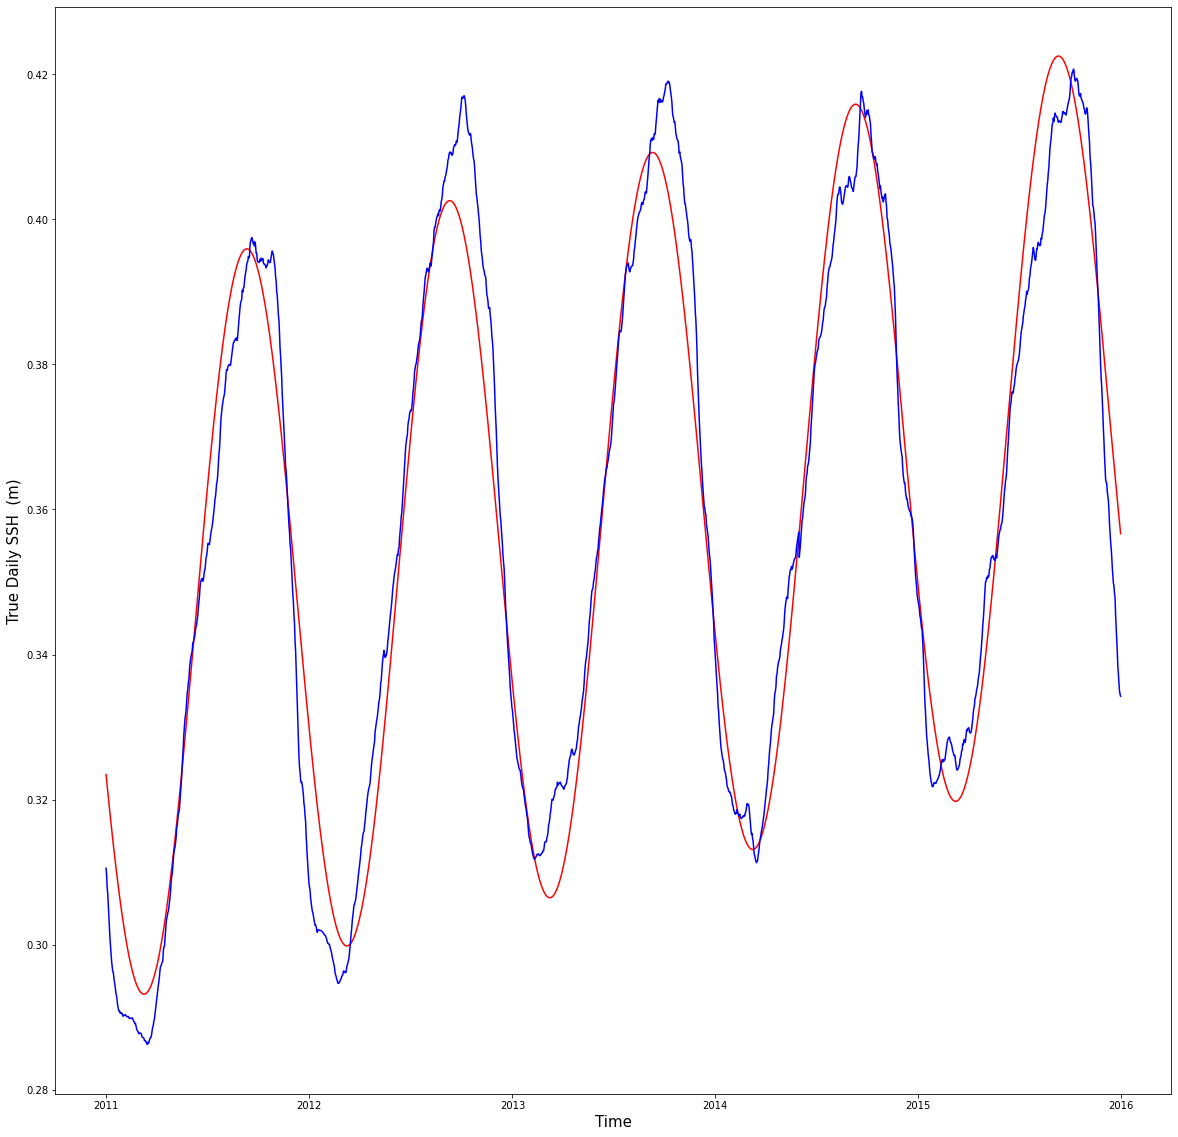

In [ ]:
plot_ts(t,y_pred,'r-','Predicted Daily mean SSH (m)') # Predicted Daily SSH
plot_ts(t,y_true,'b-','True Daily SSH  (m)') # True values of Daily SSH

###Prediction for the horizon 2100

In [ ]:
from datetime import date
d0 = date(2011, 1, 1)
d1 = date(2100, 1, 1)
delta = d1 - d0
print(f'{delta.days} days between 1st of January 2100 and 1st of January 2011')

t_2100 = t.min() + delta.days
t_delta = np.arange(t.min(),t_2100+1)

32507 days between 1st of January 2100 and 1st of January 2011


In [ ]:
X1=pd.DataFrame(t_delta,columns=['Time'])
sin_t = np.sin(2*pi*w*t_delta)
cos_t = np.cos(2*pi*w*t_delta)
X1['sin_time']=sin_t
X1['cos_time']=cos_t

In [ ]:
y_2100 = model.predict(X1)

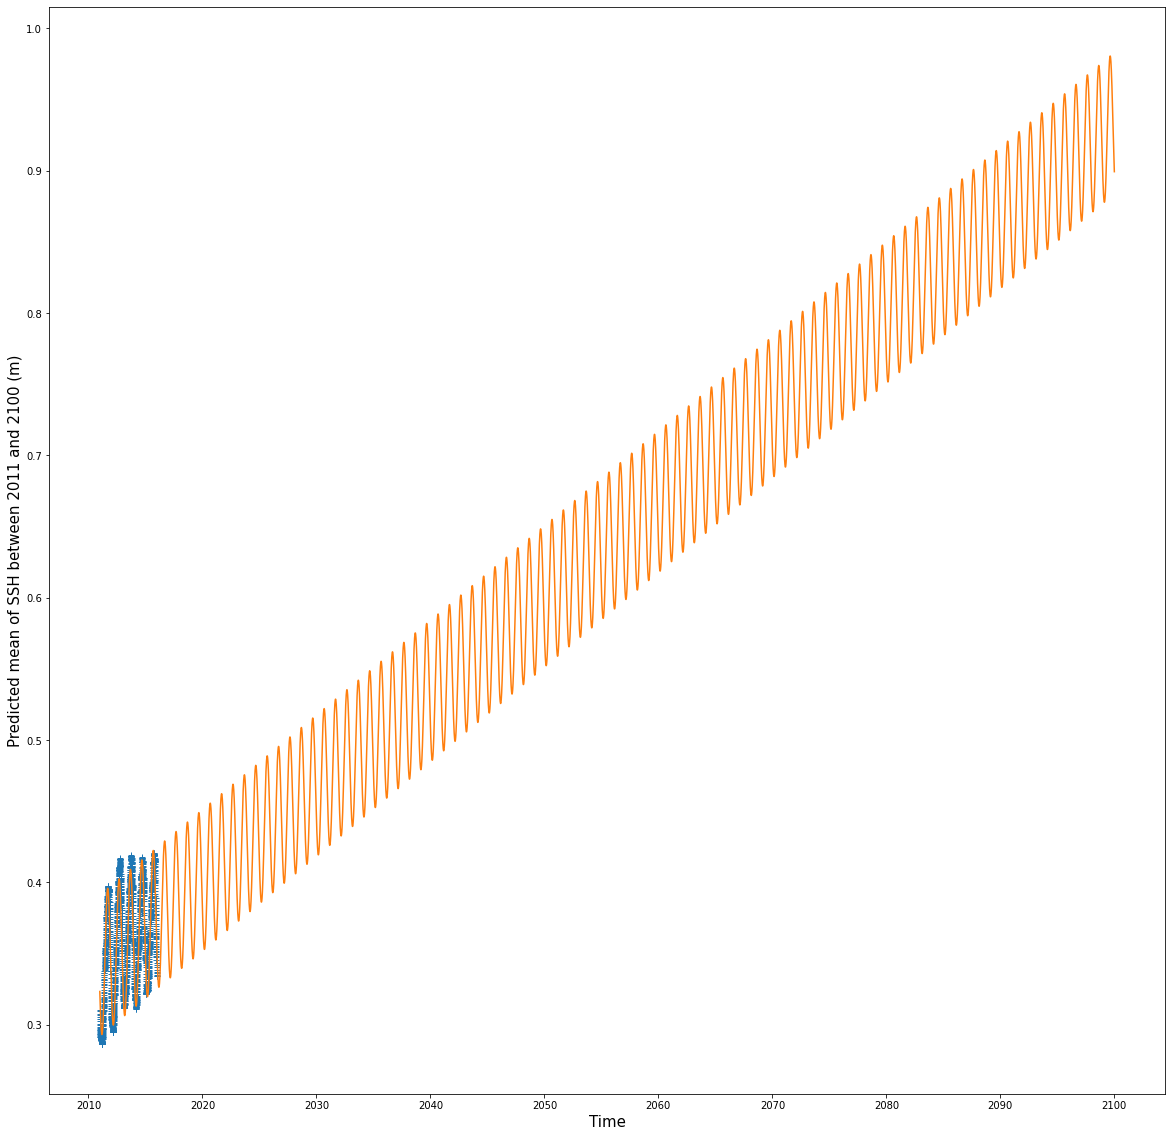

In [ ]:
plot_ts(t,y_true,'+','True Daily SSH  (m)') # True values of Daily SSH
plot_ts(t_delta,y_2100,'-','Predicted mean of SSH between 2011 and 2100 (m)') #Prediction over the 2100 horizon

In [ ]:
print(f'Mean Sea level predicted in 2100 : {round(y_2100[-1],3)} meters')
print(f'Sea level rise predicted between 2011 and 2100 is : {round(y_2100[-1] - y_true[0],3)} meters')

Mean Sea level predicted in 2100 : 0.899 meters
Sea level rise predicted between 2011 and 2100 is : 0.589 meters
